In [1]:
# Before running this file, activate the venv using "sklearn-venv\Scripts\activate"
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate,validation_curve, learning_curve
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn import datasets


#for MV
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import datasets
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import scikitplot as skplt
from sklearn.datasets import load_digits
from sklearn.model_selection import validation_curve
plt.style.use('ggplot')

# Using panda.io to read the dataset
unprocessed_data_X = pd.read_csv("heartdisease300.csv")
unprocessed_data_y = unprocessed_data_X.loc[:,"target"]

# Feature Selection using a chi-squared scoring function
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
feature_selection = SelectKBest(chi2, k=11)
processed_data_X = feature_selection.fit_transform(
    unprocessed_data_X, unprocessed_data_y)
processed_data_Y = processed_data_X[:,10]
# Hyperparameters: score_func - chi2

# These features had the 3 lowest chi2 scores and will be excluded:
# fasting blood sugar > 120 mg/dl
# resting electrocardiographic results (values 0,1,2)
# number of major vessels (0-3) colored by flourosopy

# SMOTE
# https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
smote_processed_data_X, smote_processed_data_Y = SMOTE(
).fit_resample(processed_data_X, processed_data_Y)
# Hyperparameters: sampling_strategy - auto = resampling only the minority class
# k_neighbors - default = 5

# 27 new entries were created by SMOTE to oversample the minority

# 70%/30% Training Test Split
processed_train_X, processed_test_X, processed_train_Y, processed_test_Y = train_test_split(
    processed_data_X, processed_data_Y, test_size=0.3)
smote_train_X, smote_test_X, smote_train_Y, smote_test_Y = train_test_split(
    smote_processed_data_X, smote_processed_data_Y, test_size=0.3)
# Hyperparameters: test_size - 30
# train_size - 70
# shuffle default = True


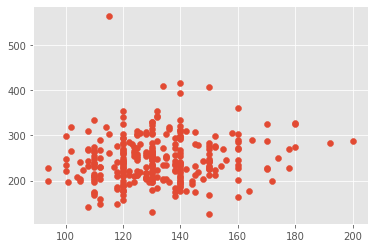

In [2]:
# print(unprocessed_data_X)
g1 = unprocessed_data_X.loc[:, "age":"target"]
plt.scatter('trestbps', 'chol', data=g1);

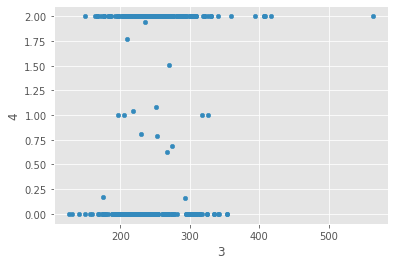

In [3]:
smoteDF = pd.DataFrame(smote_processed_data_X) # Convert SMOTE-treated data numpy array to DataFrame to use .loc
smoteDF.to_csv("SMOTEData.csv")

# print(smoteDF)
g2 = smoteDF.loc[1025:1051,:] # New data from SMOTE
# print (g2) 
smoteDF.plot(x=3, y=4, kind='scatter');

In [4]:
# RF
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

random_forest = RandomForestClassifier(n_estimators=10)

# RF w/ SMOTE
random_forest_smote = random_forest.fit(smote_train_X, smote_train_Y)
random_forest_smote_cv = cross_validate(
    random_forest_smote, smote_train_X, smote_train_Y)
print('---RANDOM FOREST---')
print('Random Forest w/ SMOTE Training Set Accuracy: ', end="")
print(np.mean(random_forest_smote_cv['test_score']))
print('Random Forest w/ SMOTE Test Set Accuracy: ', end="")
print(random_forest_smote.score(smote_test_X, smote_test_Y))

# RF w/o SMOTE
random_forest_processed = random_forest.fit(
    processed_train_X, processed_train_Y)
random_forest_processed_cv = cross_validate(
    random_forest_processed, processed_train_X, processed_train_Y)
print('Random Forest w/o SMOTE Training Accuracy: ', end="")
print(np.mean(random_forest_processed_cv['test_score']))
print('Random Forest w/o SMOTE Test Set Accuracy: ', end="")
print(random_forest_processed.score(processed_test_X, processed_test_Y))

rf_predicted_nosmote = random_forest_processed.predict(processed_test_X)
rf_predicted_smote = random_forest_smote.predict(smote_test_X)

# confusion matrix
print("confusion matrix")
print("\n")
print("without smote")
print("\n")
rf_conf_matrix_nosmote = confusion_matrix(
    processed_test_Y, rf_predicted_nosmote)
print(rf_conf_matrix_nosmote)
print("\n")
print("with smote")
print("\n")
r_conf_matrix_smote = confusion_matrix(smote_test_Y, rf_predicted_smote)
print(r_conf_matrix_smote)

# scores for stat
print("\n")
print("without smote")
print(classification_report(processed_test_Y, rf_predicted_nosmote))
print("with smote")
print(classification_report(smote_test_Y, rf_predicted_smote))

---RANDOM FOREST---
Random Forest w/ SMOTE Training Set Accuracy: 1.0
Random Forest w/ SMOTE Test Set Accuracy: 1.0
Random Forest w/o SMOTE Training Accuracy: 1.0
Random Forest w/o SMOTE Test Set Accuracy: 1.0
confusion matrix


without smote


[[53  0]
 [ 0 38]]


with smote


[[52  0]
 [ 0 47]]


without smote
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        53
         1.0       1.00      1.00      1.00        38

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

with smote
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        52
         1.0       1.00      1.00      1.00        47

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



The best parameters are {'C': 1000000.0, 'gamma': 1e-06} with a score of 1.00
---SUPPORT VECTOR MACHINE---
SVM w/ SMOTE Test Set Accuracy: 1.0
SVM w/ SMOTE Training Set Accuracy: 1.0
SVM w/o SMOTE Test Set Accuracy: 1.0
SVM w/o SMOTE Training Set Accuracy: 1.0



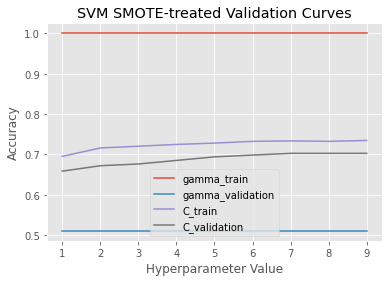

confusion matrix


without smote


[[53  0]
 [ 0 38]]


with smote


[[52  0]
 [ 0 47]]


without smote
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        53
         1.0       1.00      1.00      1.00        38

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

with smote
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        52
         1.0       1.00      1.00      1.00        47

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



In [5]:
#TODO: SVM
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(processed_test_X, processed_test_Y)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

svm = SVC(kernel='rbf', gamma=0.00001,C=10000)

# SVM w/ SMOTE
svm_processed=svm.fit(smote_train_X, smote_train_Y)
svm_predicted_nosmote = svm.predict(processed_test_X)
print('---SUPPORT VECTOR MACHINE---')
print('SVM w/ SMOTE Test Set Accuracy: ', end="")
print(svm.score(smote_test_X, smote_test_Y))
print('SVM w/ SMOTE Training Set Accuracy: ', end="")
print(svm.score(smote_train_X, smote_train_Y))

# SVM w/o SMOTE
svm_smote = svm.fit(processed_data_X, processed_data_Y)
svm_predicted_smote = svm.predict(smote_test_X)

print('SVM w/o SMOTE Test Set Accuracy: ', end="")
print(svm.score(processed_test_X, processed_test_Y))
print('SVM w/o SMOTE Training Set Accuracy: ', end="")
print(svm.score(processed_train_X, processed_train_Y))
print()

#learning curve
param_range = np.arange(0, 10, 1, dtype=int)

train_scores, test_scores = validation_curve(
    svm_smote,
    smote_train_X,
    smote_train_Y,
    param_name="gamma",
    param_range=param_range,
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_scores_mean,
         label="gamma_train")
plt.plot(param_range, test_scores_mean, label="gamma_validation")

train_scores, test_scores = validation_curve(
    svm_smote,
    smote_train_X,
    smote_train_Y,
    param_name="C",
    param_range=param_range,
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_scores_mean,
         label="C_train")
plt.plot(param_range, test_scores_mean, label="C_validation")
plt.title("SVM SMOTE-treated Validation Curves")
plt.xlabel("Hyperparameter Value")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

#confusion matrix
print("confusion matrix")
print("\n")
print("without smote")
print("\n")
svc_conf_matrix_nosmote = confusion_matrix(processed_test_Y,svm_predicted_nosmote)
print(svc_conf_matrix_nosmote)
print("\n")
print("with smote")
print("\n")
svc_conf_matrix_smote = confusion_matrix(smote_test_Y,svm_predicted_smote)
print(svc_conf_matrix_smote)

#scores for stat
print("\n")
print("without smote")
print(classification_report(processed_test_Y,svm_predicted_nosmote))
print("with smote")
print(classification_report(smote_test_Y,svm_predicted_smote))


Validation accuracy for Ensembling w/ SMOTE: 0.99


c:\Users\Matt\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Matt\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\Matt\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\Matt\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\Matt\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_voting.py", line 368, in predict
    maj = np.argmax(self.predict_proba

Best parameters for Ensembling + SMOTE: {'voting': 'hard', 'weights': (1, 1)}


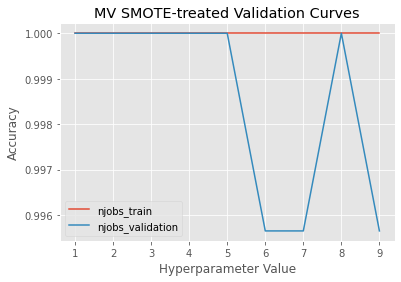


Validation accuracy for Ensembling w/o SMOTE: 0.9573099415204679


c:\Users\Matt\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Matt\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\Matt\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\Matt\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\Matt\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_voting.py", line 368, in predict
    maj = np.argmax(self.predict_proba

Best parameters for Ensembling w/o SMOTE: {'voting': 'hard', 'weights': (1, 1)}


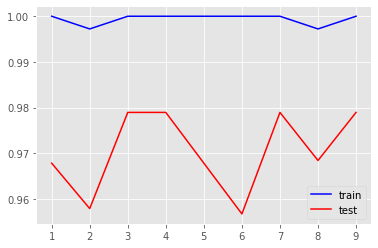

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        53
         1.0       1.00      1.00      1.00        38

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91



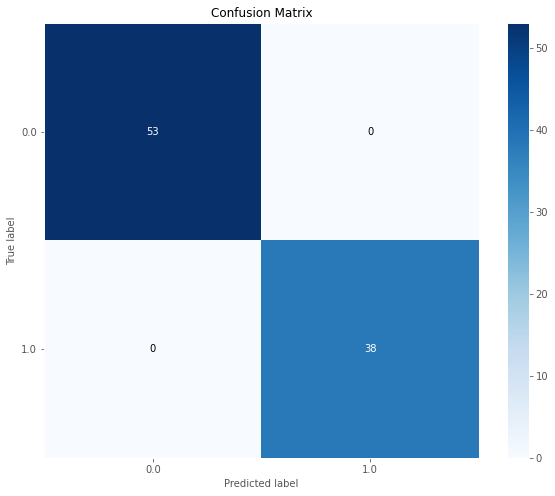

confusion matrix


without smote


[[53  0]
 [ 0 38]]


with smote


[[52  0]
 [ 0 47]]


without smote
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        53
         1.0       1.00      1.00      1.00        38

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

with smote
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        52
         1.0       1.00      1.00      1.00        47

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



In [6]:
#TODO: MV

# estimators for ensembling MV
estimators = [('RandomForest', random_forest), ('SVM', svm)]
ensemble_smote = VotingClassifier(estimators, voting='hard', weights=[1,1]) #hard voting, because we are doing MV
ensemble_smote.fit(smote_test_X, smote_test_Y)

results_smote = model_selection.cross_val_score(ensemble_smote, smote_test_X, smote_test_Y, scoring='accuracy')
print();
print("Validation accuracy for Ensembling w/ SMOTE: ", end="")
print(results_smote.mean())

# # TODO: Adjust MV Hyperparameters
# Exhaustive Grid Search with Cross Validation for Optimal Hyperparameters

params = {'voting':['soft','hard'], 
          'weights':[(1,1)]}

grid_smote = GridSearchCV(estimator=ensemble_smote, param_grid=params, cv=2)

grid_smote.fit(smote_train_X, smote_train_Y)
print("Best parameters for Ensembling + SMOTE: ", end="")
print(grid_smote.best_params_)

#{'voting': 'hard', 'weights': (1, 1)}

#validation graph
param_range = np.arange(0, 10, 1, dtype=int)

train_scores, test_scores = validation_curve(
    ensemble_smote,
    smote_train_X,
    smote_train_Y,
    param_name="n_jobs",
    param_range=param_range,
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_scores_mean,
         label="njobs_train")
plt.plot(param_range, test_scores_mean, label="njobs_validation")
plt.title("MV SMOTE-treated Validation Curves")
plt.xlabel("Hyperparameter Value")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

ensemble_proc = VotingClassifier(estimators, voting='hard', weights=[1,1]) #hard voting, because we are doing MV
ensemble_proc.fit(processed_test_X, processed_test_Y)

results_proc = model_selection.cross_val_score(ensemble_proc, processed_test_X, processed_test_Y, scoring='accuracy')
print();
print("Validation accuracy for Ensembling w/o SMOTE: ", end="")
print(results_proc.mean())


# # TODO: Adjust MV Hyperparameters
# Exhaustive Grid Search with Cross Validation for Optimal Hyperparameters
params = {'voting':['soft','hard'], 
          'weights':[(1,1)]}

grid_proc = GridSearchCV(estimator=ensemble_proc, param_grid=params, cv=2)

grid_proc.fit(processed_train_X, processed_train_Y)
print("Best parameters for Ensembling w/o SMOTE: ", end="")
print(grid_proc.best_params_)

#{'voting': 'hard', 'weights': (1, 1)}

param_range = np.arange(1,10,1, dtype=int)
train_scores, test_scores = validation_curve(
    ensemble_proc,
    processed_test_X,
    processed_test_Y,
    param_name="n_jobs",
    param_range=param_range,
)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_scores_mean,label="train", color="blue")
plt.plot(param_range, test_scores_mean,label="test", color="red")

plt.legend()
plt.show()
y_pred = ensemble_proc.predict(processed_test_X)
print(classification_report(processed_test_Y, y_pred))

skplt.metrics.plot_confusion_matrix(processed_test_Y, y_pred, figsize=(10, 8))
plt.show()
#confusion matrix
print("confusion matrix")
print("\n")
print("without smote")
print("\n")
y_proc_pred = ensemble_proc.predict(processed_test_X)
ensemble_matrix_proc = confusion_matrix(processed_test_Y,y_proc_pred)
print(ensemble_matrix_proc)
print("\n")
print("with smote")
print("\n")
y_smote_pred = ensemble_smote.predict(smote_test_X)
ensemble_matrix_smote = confusion_matrix(smote_test_Y,y_smote_pred)
print(ensemble_matrix_smote)

#scores for stat
print("\n")
print("without smote")
print(classification_report(processed_test_Y,y_proc_pred))
print("with smote")
print(classification_report(smote_test_Y,y_smote_pred))

# # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
# # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# # Refer to MV documentation for possible parameter values